# Feature Engineering

In [22]:
import numpy as np
import pandas as pd

In [23]:
df = pd.read_csv(r"RealEstate_Dataset.csv")
df.head()

,property_title,property_location,price,area,listing_type
0,120000 m2 3 Bedrooms Apartments for Rent in Dh...,"Dhofar, Salala",35.0,120000.0,For Rent
1,3 Bedrooms Chalet for Rent in Dhofar Salala,"Dhofar, Salala",25.0,250.0,For Rent
2,10 m2 Studio Apartments for Rent in Muscat Amerat,"Muscat, Amerat",7.0,10.0,For Rent
3,Furnished Daily in Muscat Al Mawaleh,"Muscat, Al Mawaleh",8.0,10.0,For Rent
4,للإيجار مكتب تجاري واجهة على شارع مزون - معرض...,"Muscat, Al Khoud",600.0,125.0,For Rent


In [24]:
df.shape

(4635, 5)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4635 entries, 0 to 4634
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   property_title     4635 non-null   object 
 1   property_location  4629 non-null   object 
 2   price              4635 non-null   float64
 3   area               4635 non-null   float64
 4   listing_type       4635 non-null   object 
dtypes: float64(2), object(3)
memory usage: 181.2+ KB


In [26]:
df.isnull().sum()

property_title       0
property_location    6
price                0
area                 0
listing_type         0
dtype: int64

In [27]:
df["price_per_sqm"] = df["price"] / df["area"]
df[["price_per_sqm"]]

,price_per_sqm
0,0.000292
1,0.100000
2,0.700000
3,0.800000
4,4.800000
...,...
4630,2.058824
4631,2.794118
4632,2.714286
4633,1.357143


In [28]:
df.dropna(subset=['property_location'], inplace=True)

In [29]:
df.isnull().sum()

property_title       0
property_location    0
price                0
area                 0
listing_type         0
price_per_sqm        0
dtype: int64

In [30]:
df["price_per_sqm"].unique

<bound method Series.unique of 0       0.000292
1       0.100000
2       0.700000
3       0.800000
4       4.800000
          ...   
4630    2.058824
4631    2.794118
4632    2.714286
4633    1.357143
4634    1.500000
Name: price_per_sqm, Length: 4629, dtype: float64>

In [31]:
def categorize_price(p):
    if p < 1:
        return "Low"
    elif p < 3:
        return "Medium"
    else:
        return "High"

df["price_category"] = df["price_per_sqm"].apply(categorize_price)
df[["price_category"]]

,price_category
0,Low
1,Low
2,Low
3,Low
4,High
...,...
4630,Medium
4631,Medium
4632,Medium
4633,Medium


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4629 entries, 0 to 4634
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   property_title     4629 non-null   object 
 1   property_location  4629 non-null   object 
 2   price              4629 non-null   float64
 3   area               4629 non-null   float64
 4   listing_type       4629 non-null   object 
 5   price_per_sqm      4629 non-null   float64
 6   price_category     4629 non-null   object 
dtypes: float64(3), object(4)
memory usage: 289.3+ KB


In [33]:
def has_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return ((series < lower) | (series > upper)).any()

outlier_columns = [col for col in df.select_dtypes(include='number').columns if has_outliers(df[col])]

In [34]:
outlier_columns

['price', 'area', 'price_per_sqm']

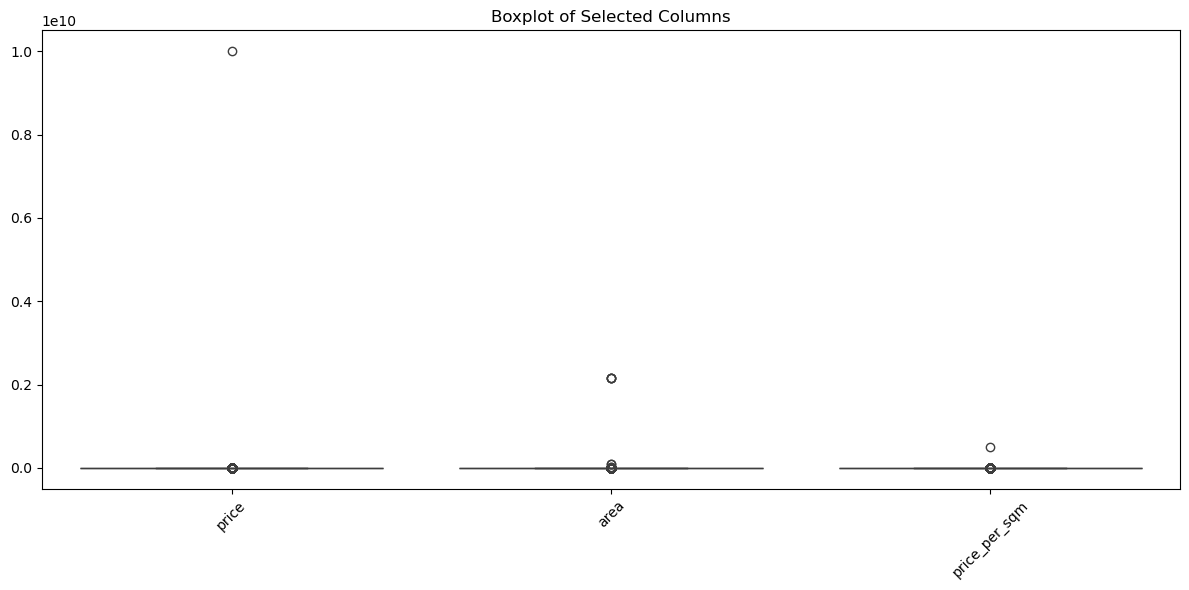

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the relevant columns
cols = ["price", "area", "price_per_sqm"]
df_box = df[cols]

# Set up the figure
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_box)
plt.title('Boxplot of Selected Columns')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [37]:
# Columns to check for outliers
cols = ["price", "area", "price_per_sqm"]

def remove_outliers_iqr(df, columns):
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Keep only rows within bounds
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    
    return df_clean

df_cleaned = remove_outliers_iqr(df, cols)

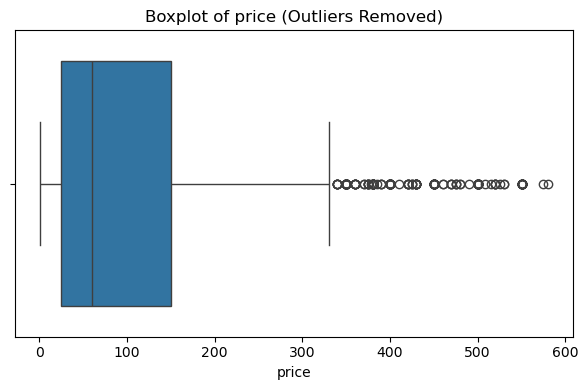

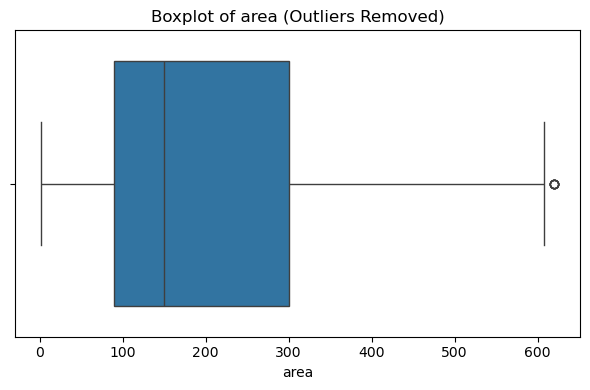

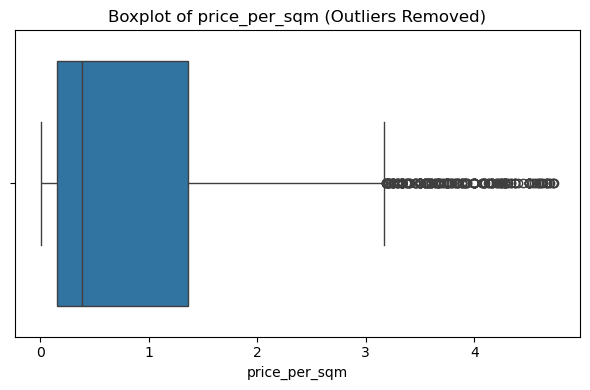

In [38]:
for col in cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df_cleaned[col])
    plt.title(f'Boxplot of {col} (Outliers Removed)')
    plt.tight_layout()
    plt.show()

In [39]:
categorical_columns = df.select_dtypes(include = 'object').columns

In [40]:
categorical_columns

Index(['property_title', 'property_location', 'listing_type',
       'price_category'],
      dtype='object')

In [41]:
from sklearn.preprocessing import LabelEncoder

cols_to_encode = ['property_title', 'property_location', 'listing_type', 'price_category']
le = LabelEncoder()

for col in cols_to_encode:
    df[col] = le.fit_transform(df[col].astype(str))  # convert to string to avoid errors with NaNs or mixed types

In [42]:
df.head()

,property_title,property_location,price,area,listing_type,price_per_sqm,price_category
0,325,54,35.0,120000.0,0,0.000292,1
1,924,54,25.0,250.0,0,0.100000,1
2,88,75,7.0,10.0,0,0.700000,1
3,2070,69,8.0,10.0,0,0.800000,1
4,2715,66,600.0,125.0,0,4.800000,0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4629 entries, 0 to 4634
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   property_title     4629 non-null   int32  
 1   property_location  4629 non-null   int32  
 2   price              4629 non-null   float64
 3   area               4629 non-null   float64
 4   listing_type       4629 non-null   int32  
 5   price_per_sqm      4629 non-null   float64
 6   price_category     4629 non-null   int32  
dtypes: float64(3), int32(4)
memory usage: 217.0 KB


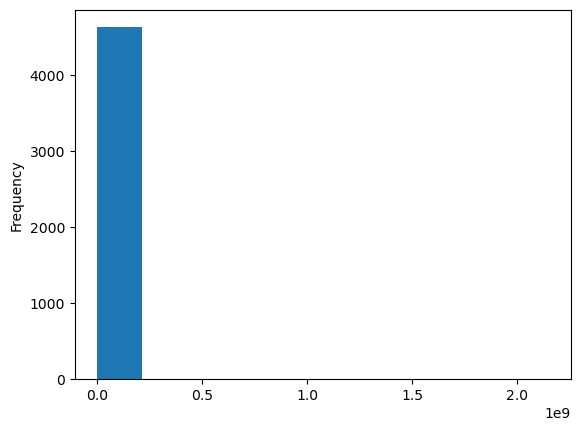

In [44]:
df["area"].plot (kind="hist")
plt.show()

In [46]:
from scipy.stats import boxcox
df["area_boxcox"], fitted_lambda = boxcox(df["area"])

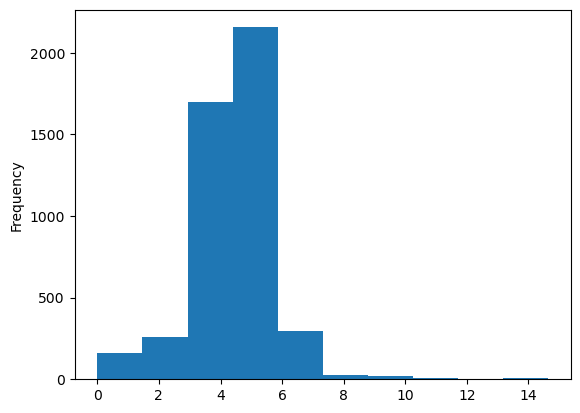

In [47]:
df["area_boxcox"].plot (kind="hist")
plt.show()

In [48]:
from sklearn.preprocessing import StandardScaler
scaling_columns = ["price", "area", "price_per_sqm"]
scaler = StandardScaler()
df[scaling_columns] = scaler.fit_transform(df[scaling_columns])

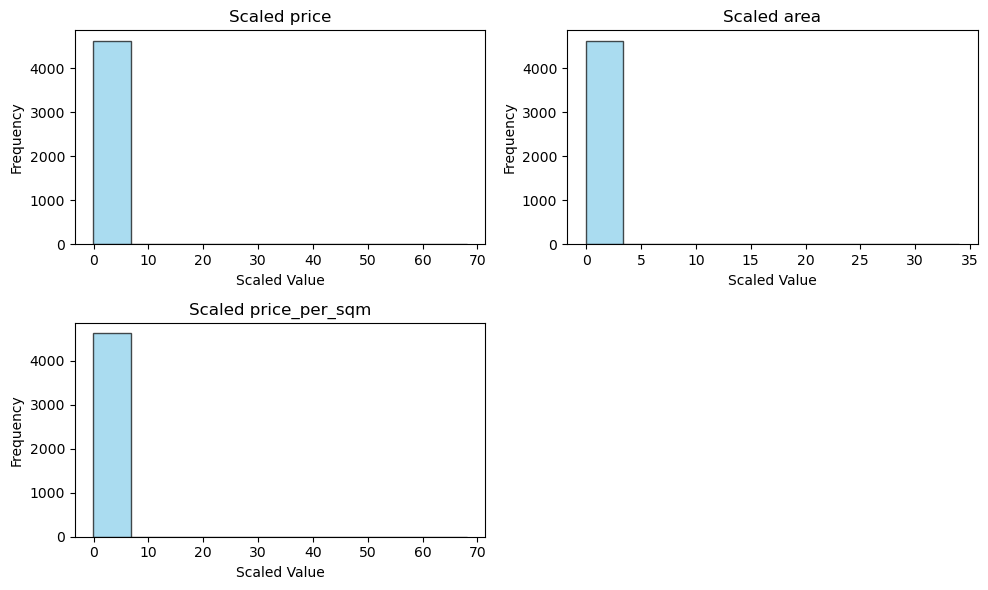

In [50]:
plt.figure(figsize = (10, 6))
# Plotting histograms for each scaled feature
for idx, column in enumerate(scaling_columns, 1):
    plt.subplot(2, 2, idx)
    plt.hist(df[column], bins=10, alpha=0.7, color = "skyblue", edgecolor = "black")
    plt.title(f"Scaled {column}")
    plt.xlabel("Scaled Value")
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [51]:
df.to_csv("FeatureEngineering.csv", index = False)